In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ipl={
    "Season":[
        2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,
        2018,2019,2020,2021,2022,2023,2024],
    "Winner":[
        "Rajasthan Royals","Deccan Chargers","Chennai Super Kings",
        "Chennai Super Kings","Kolkata Knight Riders","Mumbai Indians",
        "Kolkata Knight Riders","Mumbai Indians","Sunrisers Hyderabad",
        "Mumbai Indians","Chennai Super Kings","Mumbai Indians",
        "Mumbai Indians","Chennai Super Kings","Gujarat Titans",
        "Chennai Super Kings","Kolkata Knight Riders"],
    "Runner-up":[
        "Chennai Super Kings","Royal Challengers Bangalore",
        "Mumbai Indians","Royal Challengers Bangalore",
        "Chennai Super Kings","Chennai Super Kings",
        "Kings XI Punjab","Chennai Super Kings",
        "Royal Challengers Bangalore","Rising Pune Supergiant",
        "Sunrisers Hyderabad","Chennai Super Kings",
        "Delhi Capitals","Kolkata Knight Riders",
        "Rajasthan Royals","Gujarat Titans","Sunrisers Hyderabad"]
}


In [3]:
df_ipl=pd.DataFrame(ipl)
print(df_ipl)

    Season                 Winner                    Runner-up
0     2008       Rajasthan Royals          Chennai Super Kings
1     2009        Deccan Chargers  Royal Challengers Bangalore
2     2010    Chennai Super Kings               Mumbai Indians
3     2011    Chennai Super Kings  Royal Challengers Bangalore
4     2012  Kolkata Knight Riders          Chennai Super Kings
5     2013         Mumbai Indians          Chennai Super Kings
6     2014  Kolkata Knight Riders              Kings XI Punjab
7     2015         Mumbai Indians          Chennai Super Kings
8     2016    Sunrisers Hyderabad  Royal Challengers Bangalore
9     2017         Mumbai Indians       Rising Pune Supergiant
10    2018    Chennai Super Kings          Sunrisers Hyderabad
11    2019         Mumbai Indians          Chennai Super Kings
12    2020         Mumbai Indians               Delhi Capitals
13    2021    Chennai Super Kings        Kolkata Knight Riders
14    2022         Gujarat Titans             Rajasthan

In [4]:
df_ipl.to_csv("IPL.csv",index=False)

In [5]:
df=pd.read_csv("IPL.csv")
print(df)

    Season                 Winner                    Runner-up
0     2008       Rajasthan Royals          Chennai Super Kings
1     2009        Deccan Chargers  Royal Challengers Bangalore
2     2010    Chennai Super Kings               Mumbai Indians
3     2011    Chennai Super Kings  Royal Challengers Bangalore
4     2012  Kolkata Knight Riders          Chennai Super Kings
5     2013         Mumbai Indians          Chennai Super Kings
6     2014  Kolkata Knight Riders              Kings XI Punjab
7     2015         Mumbai Indians          Chennai Super Kings
8     2016    Sunrisers Hyderabad  Royal Challengers Bangalore
9     2017         Mumbai Indians       Rising Pune Supergiant
10    2018    Chennai Super Kings          Sunrisers Hyderabad
11    2019         Mumbai Indians          Chennai Super Kings
12    2020         Mumbai Indians               Delhi Capitals
13    2021    Chennai Super Kings        Kolkata Knight Riders
14    2022         Gujarat Titans             Rajasthan

In [6]:
winner_count=df["Winner"].value_counts()
print(winner_count)

Winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64


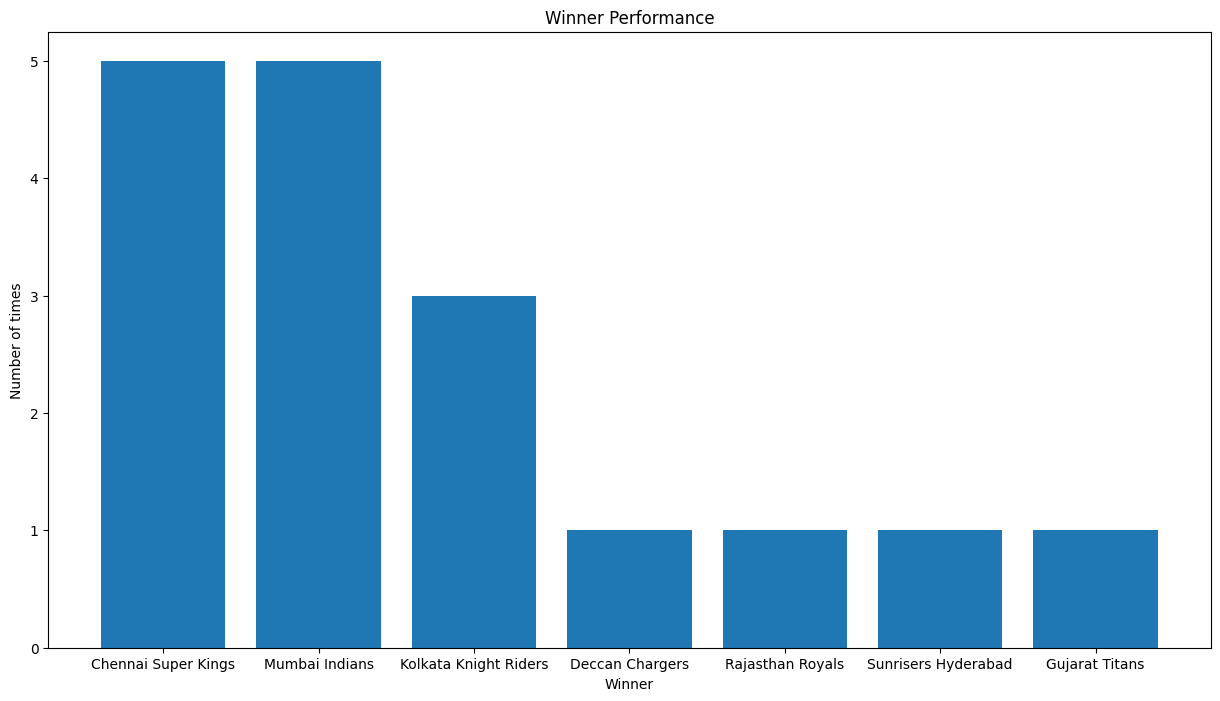

In [7]:
plt.figure(figsize=(15,8))
plt.bar(winner_count.index,winner_count.values)
plt.xlabel("Winner")
plt.ylabel("Number of times")
plt.title("Winner Performance")
plt.show()

In [8]:
runner_count=df["Runner-up"].value_counts()
print(runner_count)

Runner-up
Chennai Super Kings            5
Royal Challengers Bangalore    3
Sunrisers Hyderabad            2
Mumbai Indians                 1
Kings XI Punjab                1
Rising Pune Supergiant         1
Delhi Capitals                 1
Kolkata Knight Riders          1
Rajasthan Royals               1
Gujarat Titans                 1
Name: count, dtype: int64


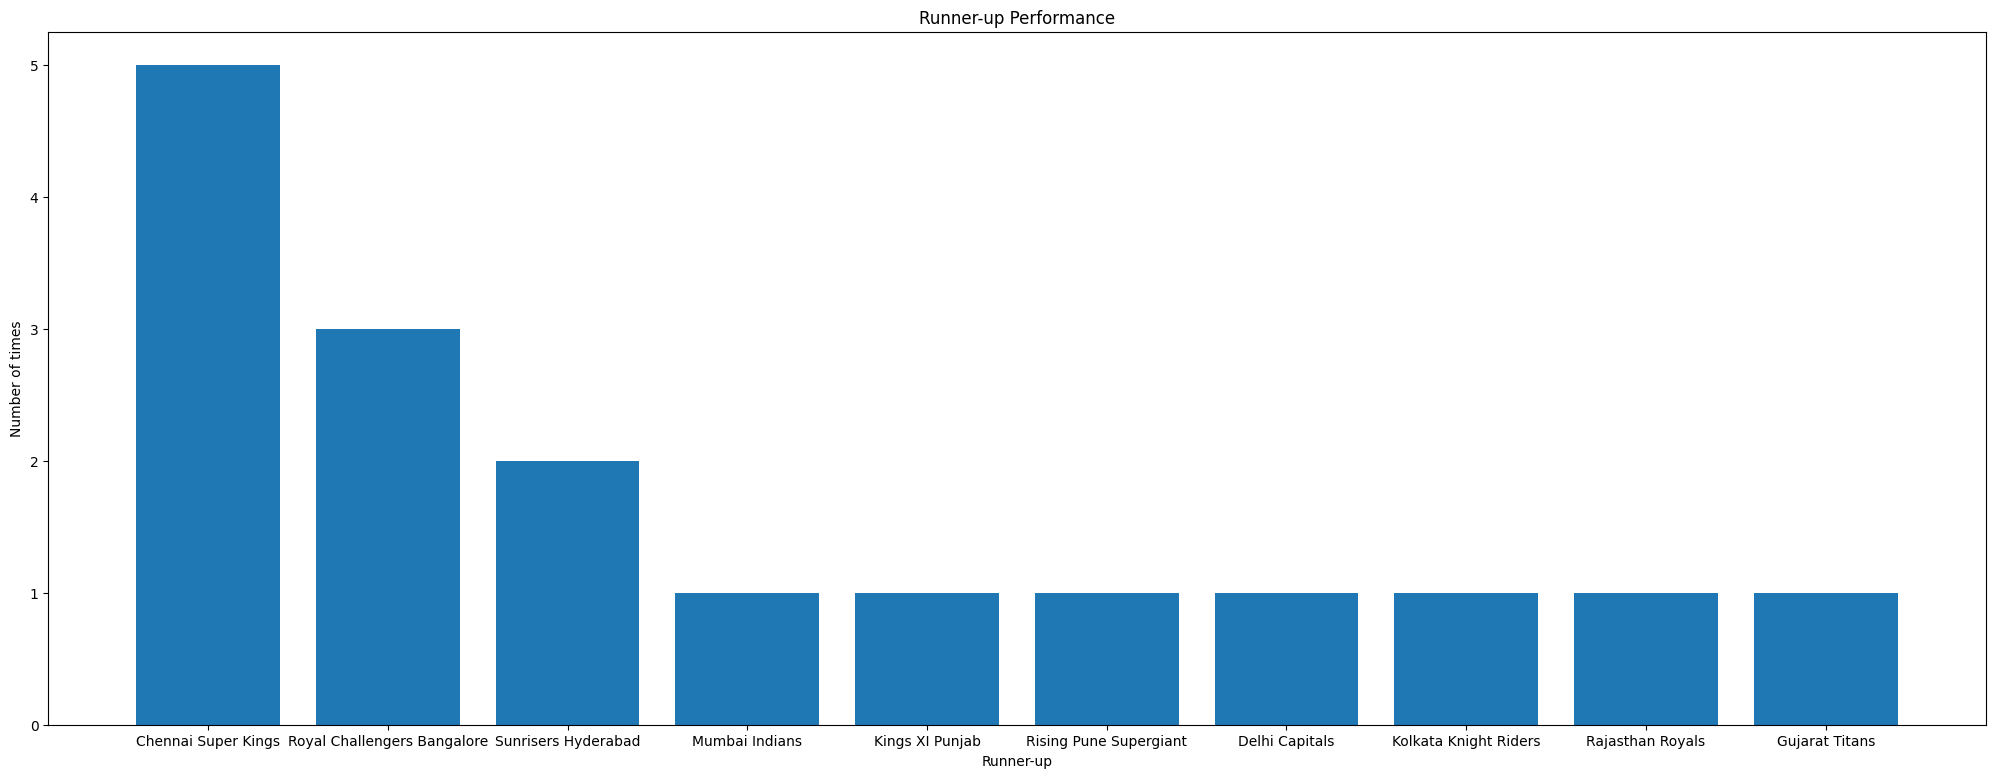

In [9]:
plt.figure(figsize=(25,9))
plt.bar(runner_count.index,runner_count.values)
plt.xlabel("Runner-up")
plt.ylabel("Number of times")
plt.title("Runner-up Performance")
plt.show()

In [11]:
final_appearances=pd.concat([df["Winner"],df["Runner-up"]]).value_counts()
print(final_appearances)

Chennai Super Kings            10
Mumbai Indians                  6
Kolkata Knight Riders           4
Sunrisers Hyderabad             3
Royal Challengers Bangalore     3
Gujarat Titans                  2
Rajasthan Royals                2
Deccan Chargers                 1
Kings XI Punjab                 1
Rising Pune Supergiant          1
Delhi Capitals                  1
Name: count, dtype: int64


In [13]:
top_teams=winner_count[winner_count>=2]
print(top_teams)

Winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Name: count, dtype: int64


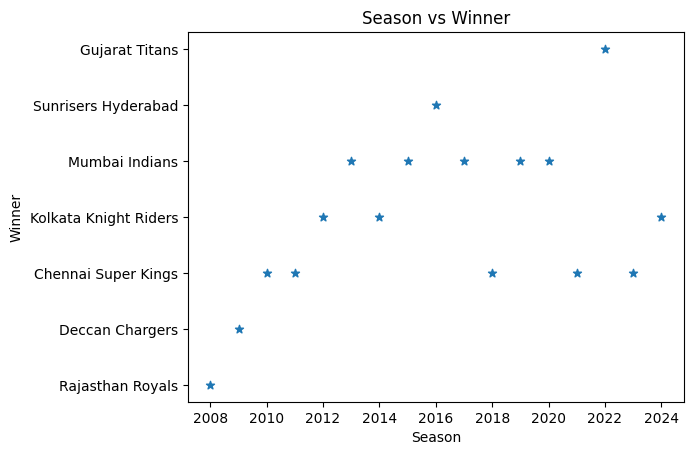

In [16]:
plt.scatter(df["Season"],df["Winner"],marker='*')
plt.xlabel("Season")
plt.ylabel("Winner")
plt.title("Season vs Winner")
plt.show()

In [18]:
teams_in_finals=set(final_appearances.index)
teams_won=set(winner_count.index)
never_won=teams_in_finals-teams_won
print(never_won)

{'Rising Pune Supergiant', 'Delhi Capitals', 'Royal Challengers Bangalore', 'Kings XI Punjab'}


In [19]:
df["prev_winner"]=df["Winner"].shift(1)
back_to_back=df[df["Winner"]==df["prev_winner"]]
print(back_to_back)

    Season               Winner                    Runner-up  \
3     2011  Chennai Super Kings  Royal Challengers Bangalore   
12    2020       Mumbai Indians               Delhi Capitals   

            prev_winner  
3   Chennai Super Kings  
12       Mumbai Indians  


In [21]:
df["final_match"]=df["Winner"]+" vs " +df["Runner-up"]
print(df["final_match"].value_counts())

final_match
Mumbai Indians vs Chennai Super Kings                 3
Deccan Chargers vs Royal Challengers Bangalore        1
Rajasthan Royals vs Chennai Super Kings               1
Chennai Super Kings vs Mumbai Indians                 1
Chennai Super Kings vs Royal Challengers Bangalore    1
Kolkata Knight Riders vs Chennai Super Kings          1
Kolkata Knight Riders vs Kings XI Punjab              1
Sunrisers Hyderabad vs Royal Challengers Bangalore    1
Mumbai Indians vs Rising Pune Supergiant              1
Chennai Super Kings vs Sunrisers Hyderabad            1
Mumbai Indians vs Delhi Capitals                      1
Chennai Super Kings vs Kolkata Knight Riders          1
Gujarat Titans vs Rajasthan Royals                    1
Chennai Super Kings vs Gujarat Titans                 1
Kolkata Knight Riders vs Sunrisers Hyderabad          1
Name: count, dtype: int64


In [22]:
df["Decade"]=(df["Season"]//10)*10
decade_wins=df.groupby("Decade")["Winner"].value_counts()
print(decade_wins)

Decade  Winner               
2000    Deccan Chargers          1
        Rajasthan Royals         1
2010    Mumbai Indians           4
        Chennai Super Kings      3
        Kolkata Knight Riders    2
        Sunrisers Hyderabad      1
2020    Chennai Super Kings      2
        Gujarat Titans           1
        Kolkata Knight Riders    1
        Mumbai Indians           1
Name: count, dtype: int64


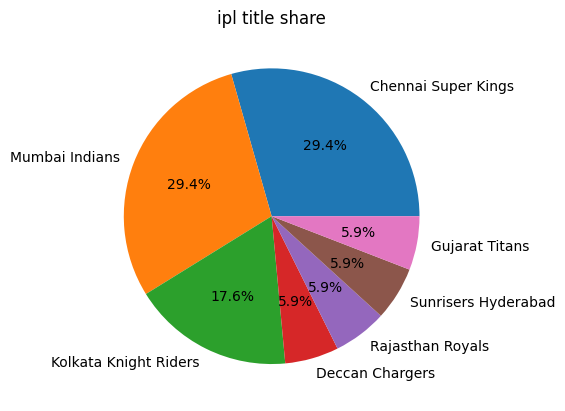

In [23]:
plt.pie(winner_count.values,labels=winner_count.index,autopct="%1.1f%%")
plt.title("ipl title share")
plt.show()